In [3]:
# Linear regression: Study of the effect of temperature on the antenna frequency of a high-temperature wireless MSPA
# Publication: Far-Field Interrogation of Microstrip Patch Antenna for Temperature Sensing Without Electronics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
np.set_printoptions(precision=3)
%matplotlib inline

In [3]:
# Load data from excel file

In [4]:
df = pd.read_csv('dT_dff_data2.csv')

In [5]:
df.head(5)

,Temperature_change,Normalized_frequency
0,0.0,1029.660103
1,0.0,997.548335
2,0.0,990.042960
3,0.0,1019.622979
4,0.0,1019.115653


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_change    26000 non-null  float64
 1   Normalized_frequency  26000 non-null  float64
dtypes: float64(2)
memory usage: 406.4 KB


In [7]:
df.describe()

,Temperature_change,Normalized_frequency
count,26000.000000,26000.000000
mean,125.001159,25019.842510
std,74.999904,14409.747131
min,0.000000,937.737704
25%,60.000809,12531.263458
50%,125.162490,25050.809625
75%,189.962170,37500.845683
max,250.042283,49044.135040


In [8]:
dT = df.Temperature_change  # Temperature change in degree C
dff = df.Normalized_frequency  # Normalized antenna frequency shift

In [9]:
dT.shape

(26000,)

In [10]:
dff.shape

(26000,)

In [11]:
x = np.array(dT).reshape(-1, 1)  # Input data
y = np.array(dff).reshape(-1, 1)  # Target

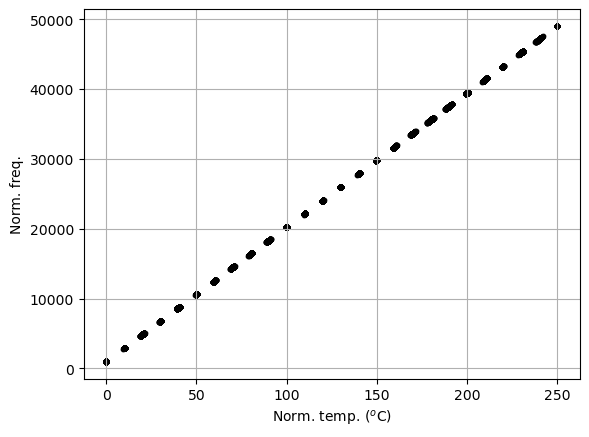

In [12]:
# Plotting dataset for visualization
fig1, ax = plt.subplots()
ax.scatter(x, y, color='black', marker='o', s=10, label='data')
ax.set_xlabel('Norm. temp. ($^o$C)')
ax.set_ylabel('Norm. freq.')
ax.grid()

In [22]:
# Note: There is a linear relationship between input and target, and this agrees with domain knowledge
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)  

In [23]:
x_train.shape

(20800, 1)

In [24]:
x_test.shape

(5200, 1)

In [25]:
# Training the model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [26]:
print(f'Training set mean squared error: {mse(y_train, model.predict(x_train)): .3f}')
print(f'Test set mean squared error: {mse(y_test, model.predict(x_test)): .3f}')
print(f'The regression coefficient is{model.coef_.squeeze(): .3f} and '
      f'the intercept is{model.intercept_.squeeze(): .3f}')
print('Model Score: ' + str(model.score(x_test, y_test)))  

Training set mean squared error:  12.656
Test set mean squared error:  11.267
The regression coefficient is 192.130 and the intercept is 1003.400
Model Score: 0.9999999450268487
